In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ganti dengan path dataset Anda di Google Drive
dataset_path = '/content/drive/MyDrive/Data Science/Portfolio/MP 2 - Predict Customer Clicked Ads Classification by Using Machine Learning/Clicked Ads Dataset.csv'

# Baca dataset dengan pandas
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df.shape

(1000, 11)

In [ ]:
# Cek unique value setiap kolom
for column_name in df.columns:
    unique_values = df[column_name].unique()
    unique_values_str = ", ".join(map(str, unique_values))

    print(f"Unique values in '{column_name}', {df[column_name].nunique()} nunique:\n == {unique_values_str} == \n")

Unique values in 'Unnamed: 0', 1000 nunique:
 == 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 2

In [ ]:
#membagi kolom menjadi kategorikal dan numerikal
num = ['Daily Time Spent on Site', 'Age', 'Area Income' , 'Daily Internet Usage']

cat = ['Male', 'city', 'province', 'category']

In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [ ]:
df[cat].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


# Univariate Analysis

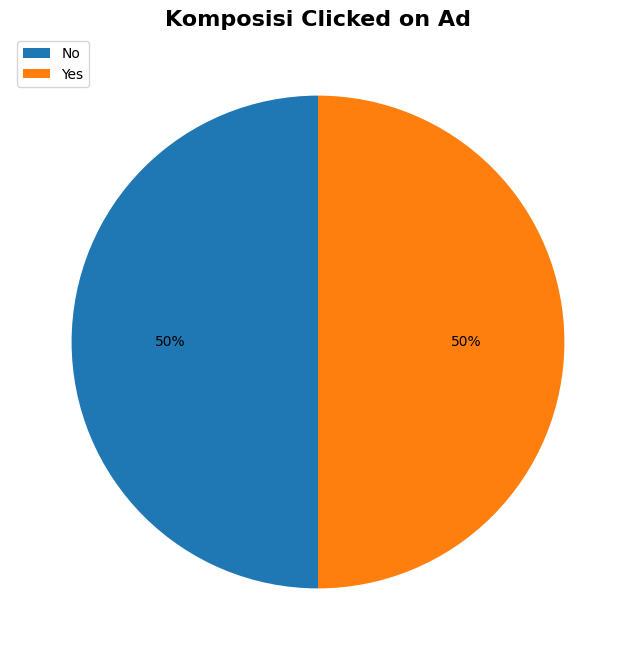

In [ ]:
plt.figure(figsize=(10,8))

target_count = df['Clicked on Ad'].value_counts()

plt.pie(target_count, autopct='%1.0f%%', startangle=90)
plt.title('Komposisi Clicked on Ad', fontsize=16, fontweight='bold')
plt.legend(labels=['No', 'Yes'], loc='upper left')
plt.show()

Persebaran data pada target (Clicked on Ad) sama ratanya, sehingga tidak diperlukan pemrosesan untuk mengurangi / menambah data.

Numerical Columns

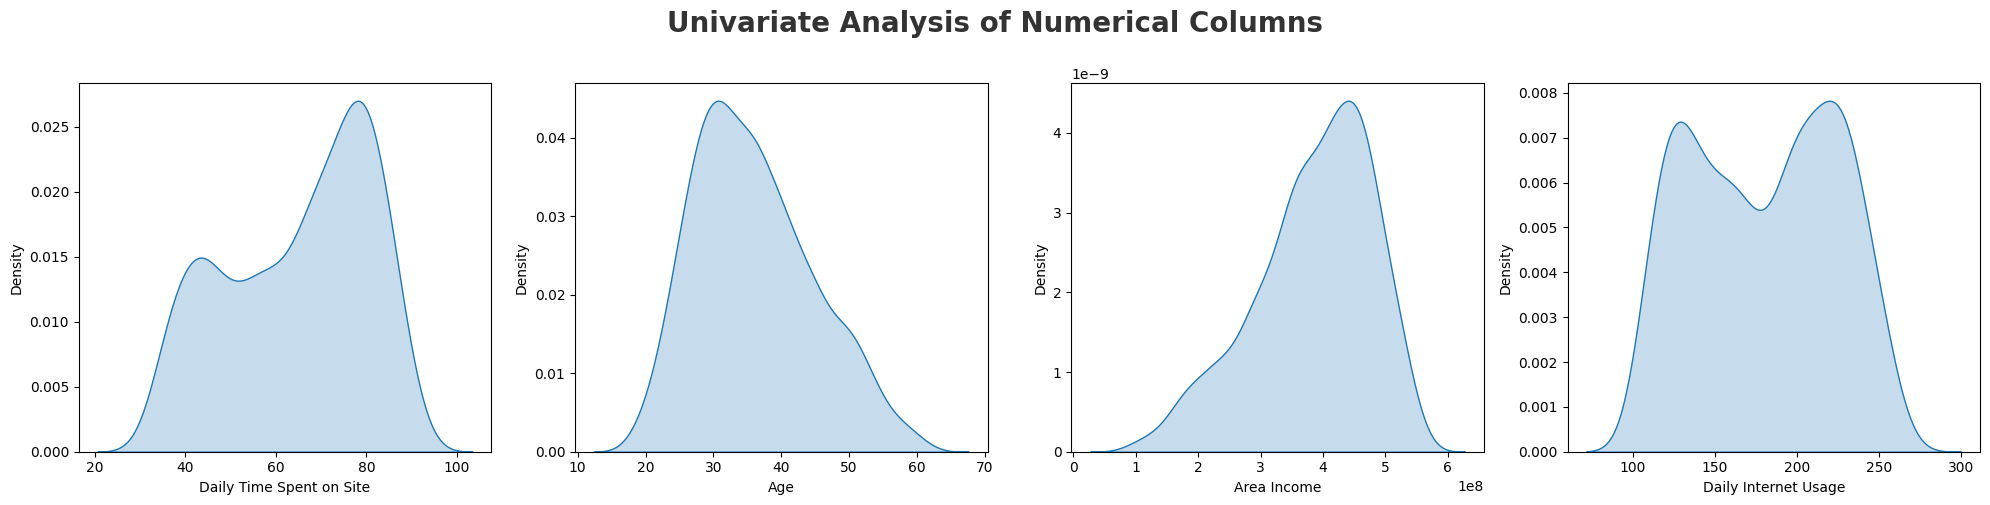

In [ ]:
plt.figure(figsize=(20,5))

for i, col in enumerate(num):
  plt.subplot(1,len(num), i+1)
  sns.kdeplot(data=df[col], fill=True)
  plt.xlabel(col)

plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

In [ ]:
# Check tingkat kemiringan distribusi data numerik dengan skewness score
for i in range(0, len(num)):
    print(f"Skewness {df[num].columns[i]} : {df[num[i]].skew():.3f}")

Skewness Daily Time Spent on Site : -0.370
Skewness Age : 0.479
Skewness Area Income : -0.644
Skewness Daily Internet Usage : -0.031


Kesimpulan:
*   Kolom Daily Time Spent on Site, Age, Daily Internet Usage memiliki distribusi yang hampir normal.
*   Kolom Area Income memiliki negative skewed yang mengindikasi adanya outlier.



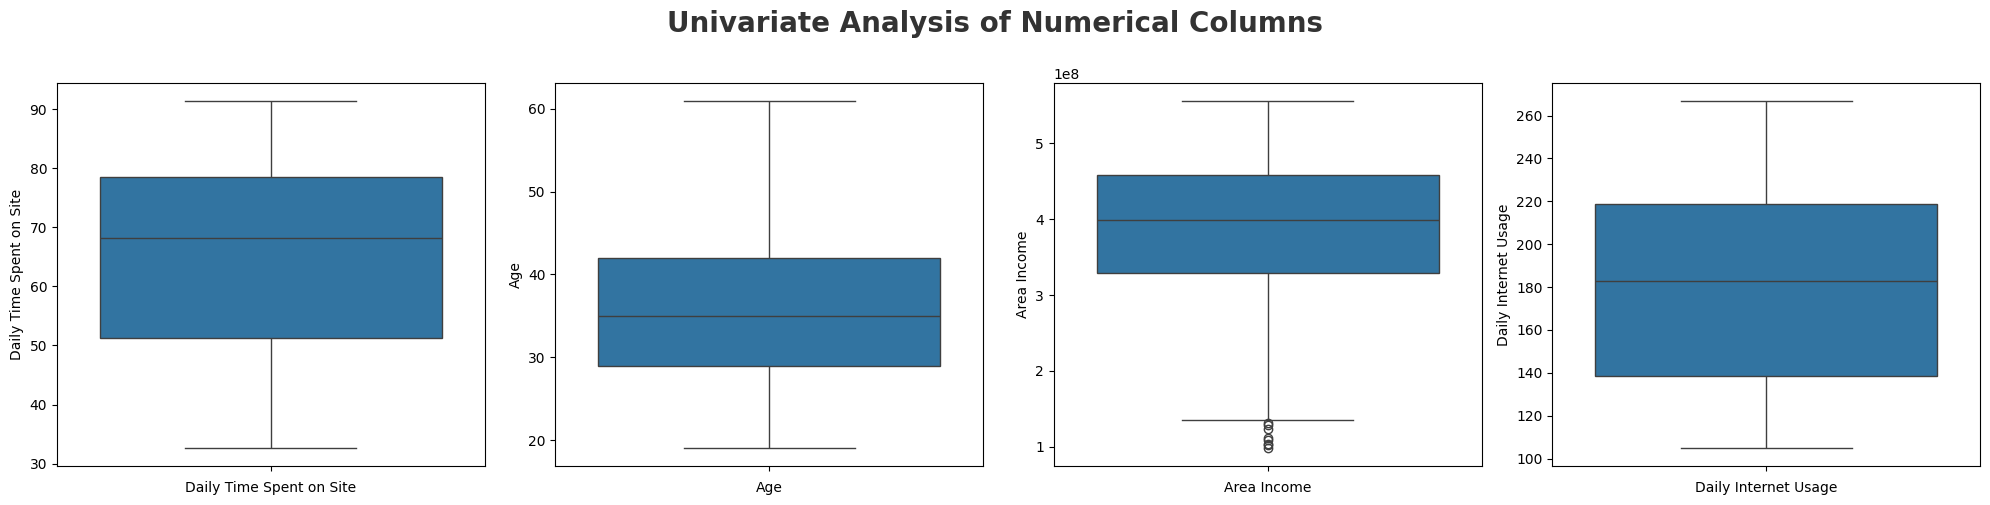

In [ ]:
plt.figure(figsize=(20,5))

for i, col in enumerate(num):
  plt.subplot(1,len(num), i+1)
  sns.boxplot(y=df[col])
  plt.xlabel(col)

plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

Categorical Columns

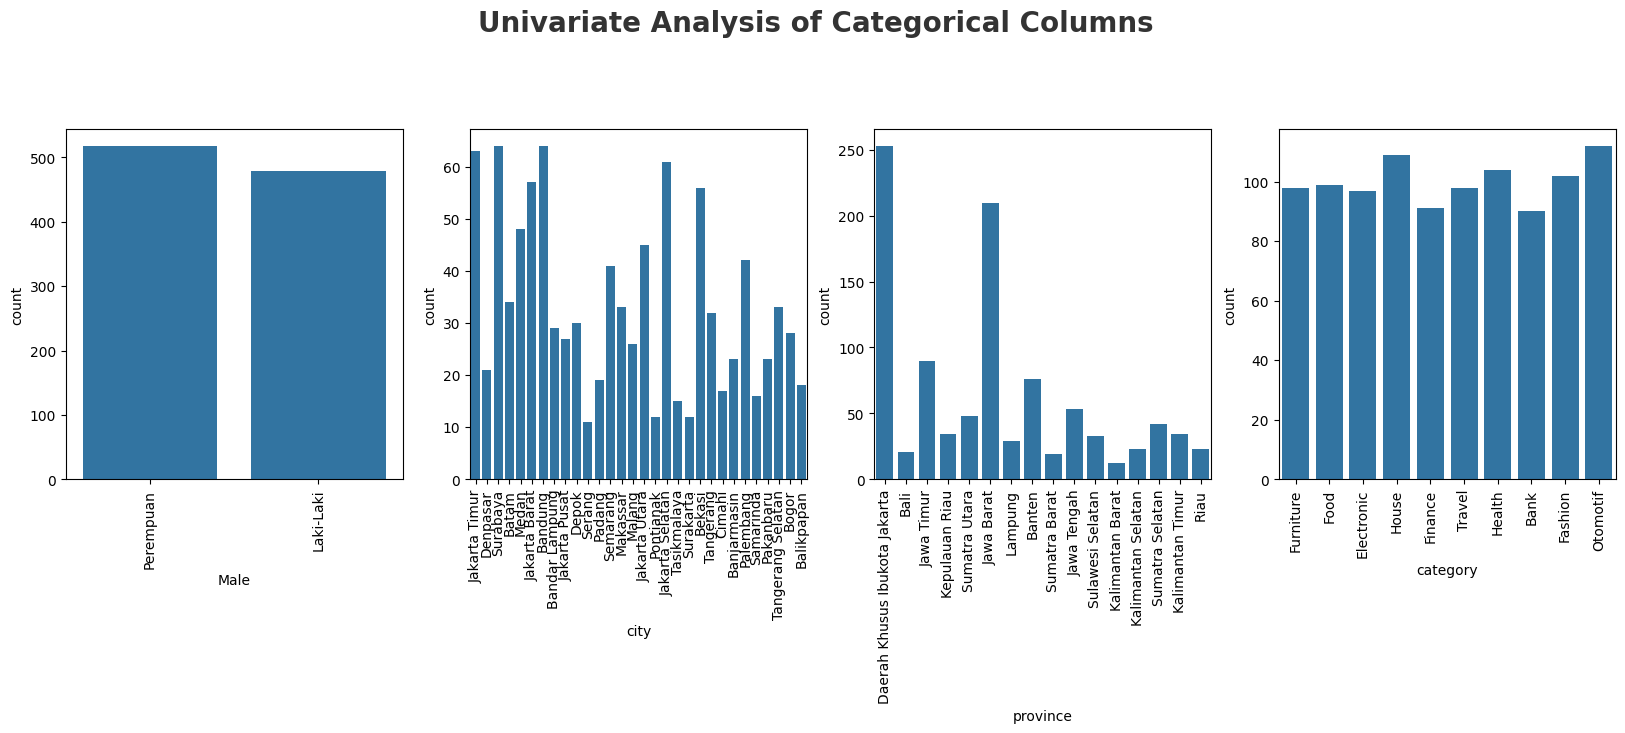

In [ ]:
plt.figure(figsize=(20,10))

for i, col in enumerate(cat):
  plt.subplot(2, len(cat), i+1)
  sns.countplot(data=df[cat], x=col)
  plt.xlabel(col)
  plt.xticks(rotation=90)
  plt.xlabel(col)

plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout
plt.show()

# Bivariate Analysis

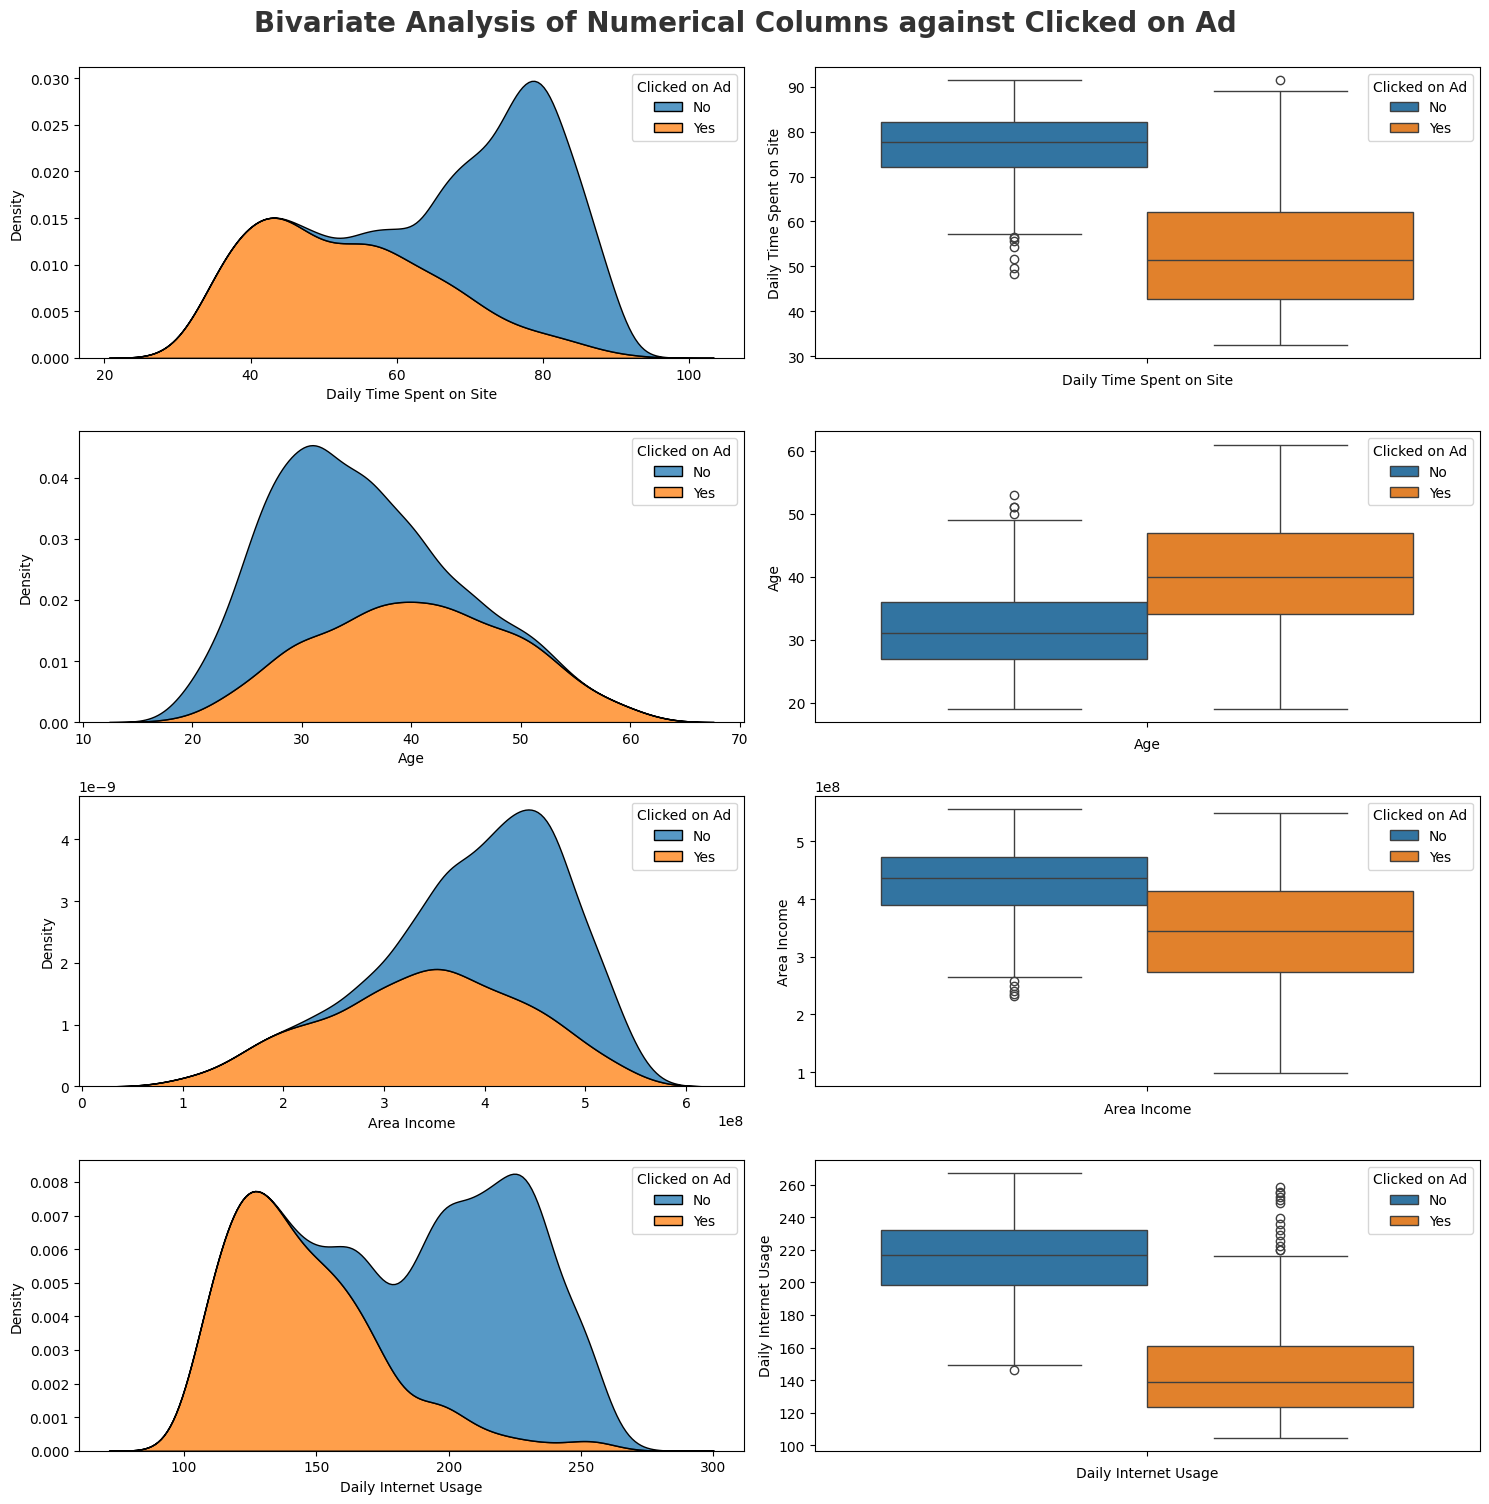

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Columns against Clicked on Ad', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE dan Box plot untuk setiap kolom numerikal dengan target 'Clicked on Ad'
for i, col in enumerate(num):
    plt.subplot(4, 2, 2*i+1)
    sns.kdeplot(data=df, x=col, hue='Clicked on Ad', fill=True, multiple='stack')
    plt.xlabel(col)

    plt.subplot(4, 2, 2*i+2)
    sns.boxplot(data=df, hue='Clicked on Ad', y=col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

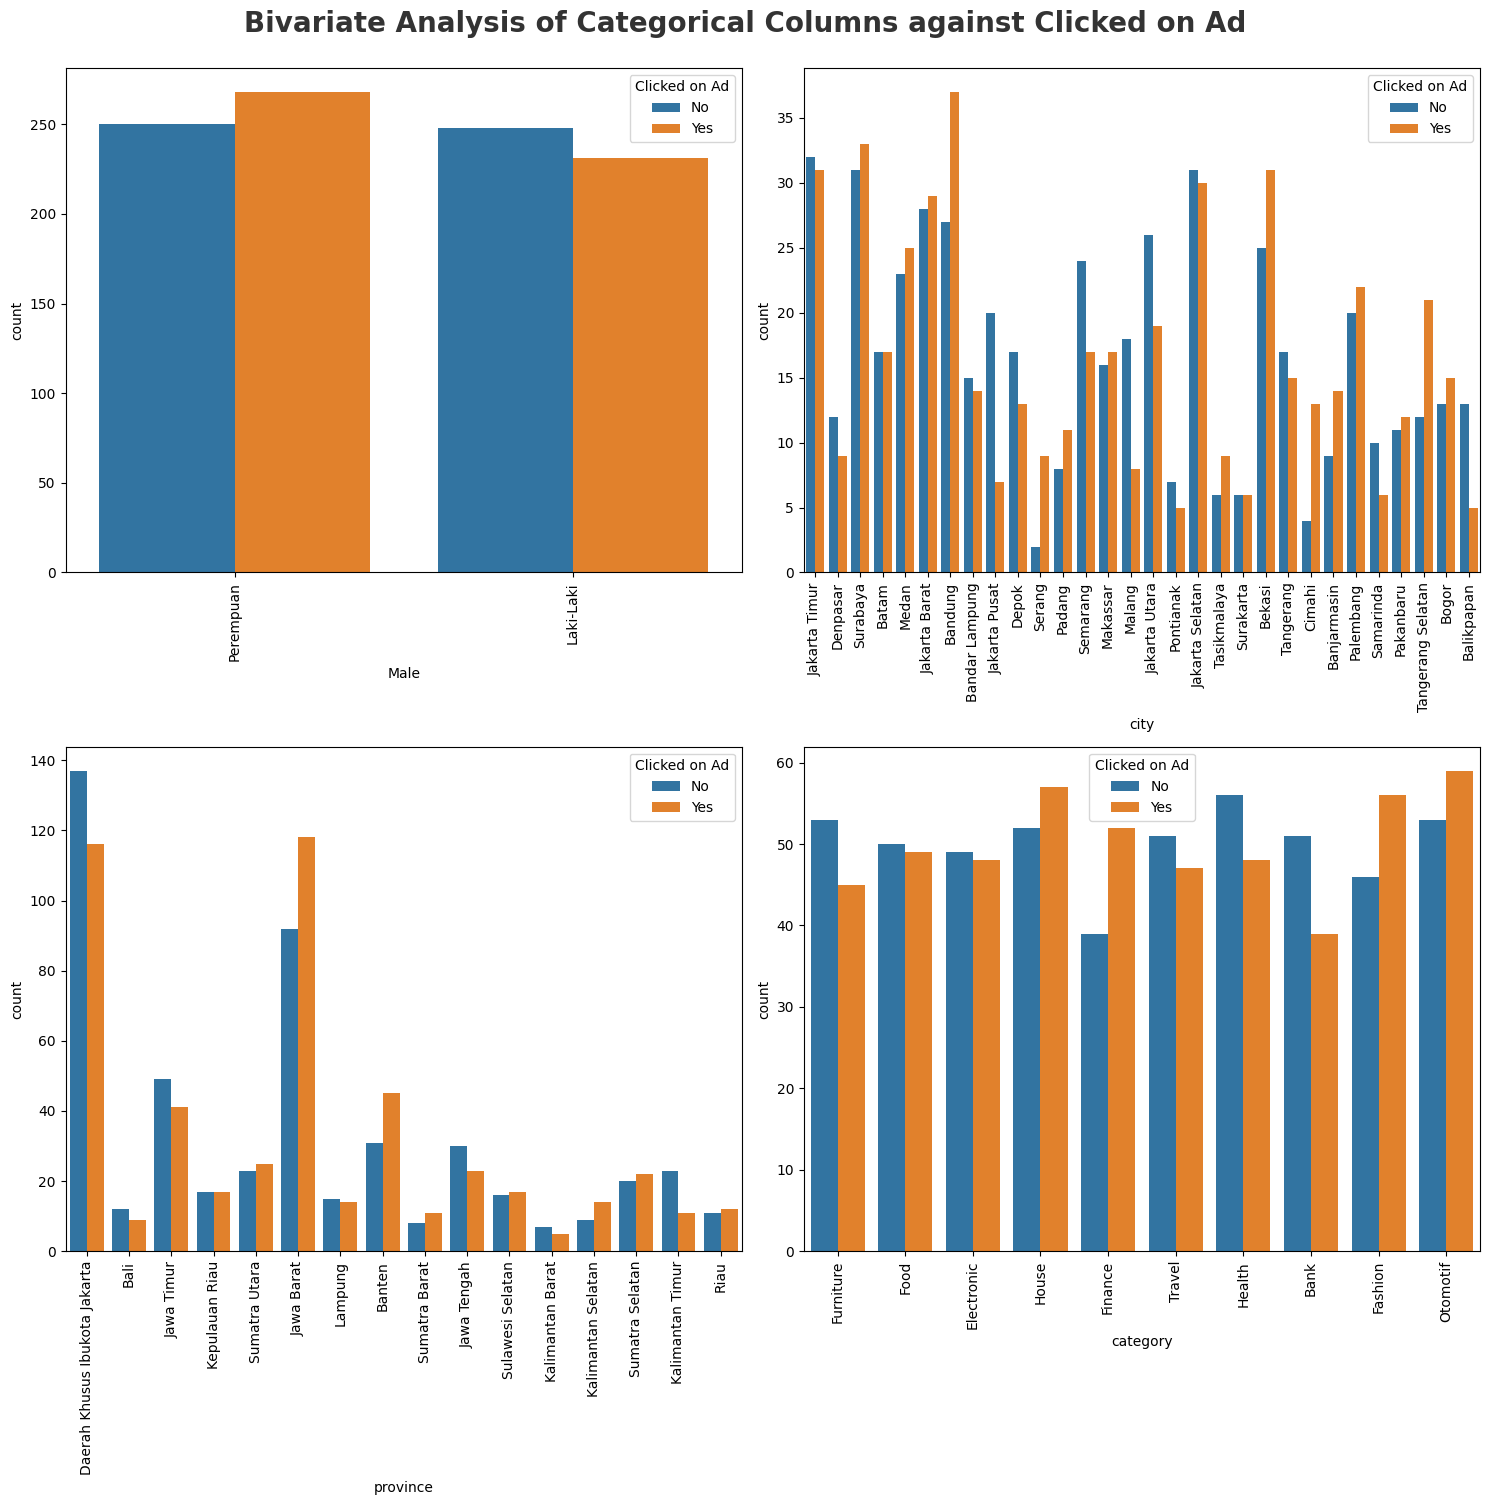

In [ ]:
plt.figure(figsize=(15,15))

for i, col in enumerate(cat):
  plt.subplot(2, 2, i+1)
  sns.countplot(x=df[cat[i]], hue=df['Clicked on Ad'])
  plt.xlabel(col)
  plt.xticks(rotation=90)

plt.suptitle('Bivariate Analysis of Categorical Columns against Clicked on Ad', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

# Heatmap Analysis

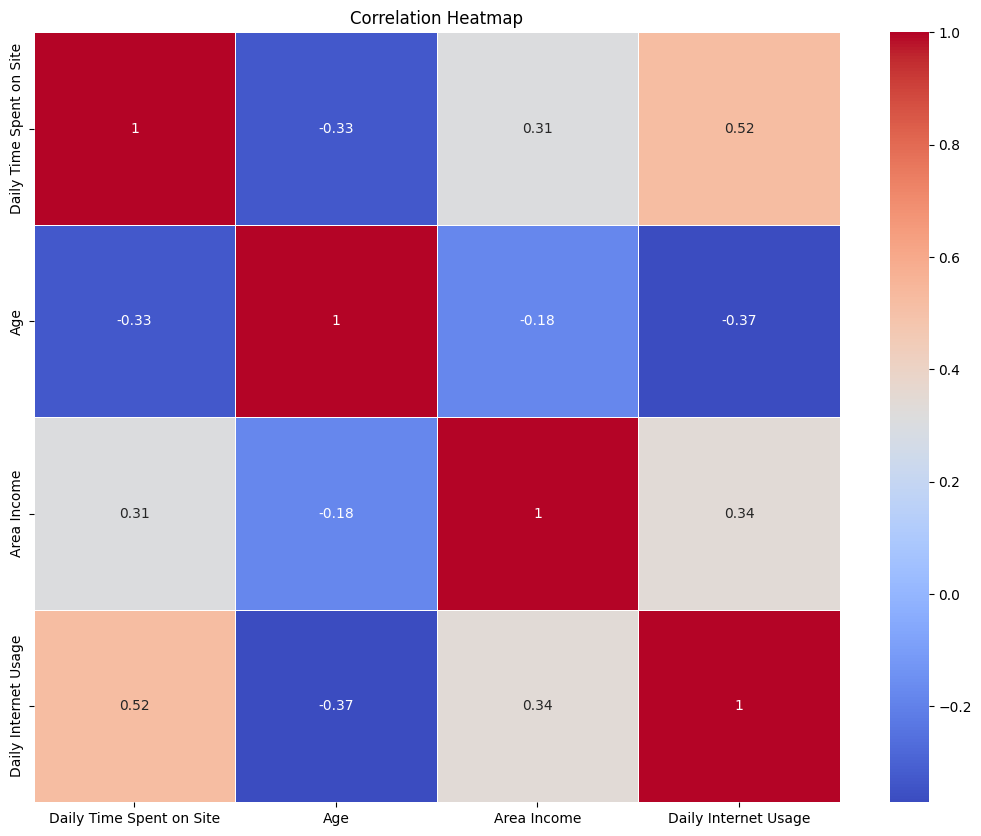

In [ ]:
# Create a heatmap
correlation_matrix = df[num].corr()
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* Daily Time Spent on Site dan Daily Internet Usage memiliki korelasi positif yang cukup kuat. Artinya, semakin banyak waktu yang dihabiskan seseorang di situs web, semakin besar kemungkinan mereka memiliki penggunaan internet harian yang tinggi.
* Daily Time Spent on Site dan Age memiliki korelasi negatif yang cukup kuat. Artinya berarti semakin tinggi usia seseorang, semakin sedikit waktu yang mereka habiskan di situs web.


KESIMPULAN :

* Customer yang klik iklan memiliki rata-rata waktu mengunjungi layar antara 40-50 menit.
* Umur customer yang klik iklan diantara range 35-45 tahun.
* Customer dengan pendapatan area di antara 2.5-4 cenderung untuk klik iklan.
* Customer dengan penggunaan 120-160 cenderung untuk klik iklan.
* Perempuan lebih banyak klik iklan dibandingkan laki-laki.
* Kota Bandung memiliki tingkat klik iklan yang paling tinggi, sedangkan yang paling rendah di Kota Serang.
* Provinsi Jawa Barat memiliki tingkat klik iklan yang paling tinggi, sedangkan yang paling rendah di Provinsi Kalimantan Barat.
* Kategori yang paling diminati adalah otomotif, sedangkan yang paling tidak diminati adalah finance.

# Data Pre-Processing

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.isnull().sum().sort_values(ascending=False)

,0
Daily Time Spent on Site,13
Area Income,13
Daily Internet Usage,11
Male,3
Unnamed: 0,0
Age,0
Timestamp,0
Clicked on Ad,0
city,0
province,0


Terdapat 13 data null, data tersebut sangat kecil dibandingkan keseluruhan data (1,3%). Sehingga dilakukan penghapusan.

In [ ]:
df_clean = df_clean.dropna(subset=['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Male']).reset_index(drop=True)

In [ ]:
df_clean.duplicated().sum()

0

In [ ]:
df_clean.shape

(963, 11)

In [ ]:
#Mengubah nama kolom 'Male' menjadi 'Gender'
df_clean.rename(columns={'Male':'Gender'}, inplace=True)

# Feature Encoding

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                963 non-null    int64  
 1   Daily Time Spent on Site  963 non-null    float64
 2   Age                       963 non-null    int64  
 3   Area Income               963 non-null    float64
 4   Daily Internet Usage      963 non-null    float64
 5   Gender                    963 non-null    object 
 6   Timestamp                 963 non-null    object 
 7   Clicked on Ad             963 non-null    object 
 8   city                      963 non-null    object 
 9   province                  963 non-null    object 
 10  category                  963 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 82.9+ KB


In [ ]:
# Melakukan one hot encoding
df_clean = pd.get_dummies(df_clean, columns=['Gender', 'Clicked on Ad', 'city', 'province', 'category'], drop_first=True)

In [ ]:
df_clean.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Timestamp,Gender_Perempuan,Clicked on Ad_Yes,city_Bandar Lampung,city_Bandung,...,province_Sumatra Utara,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,3/27/2016 0:53,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,80.23,31,479092950.0,193.77,4/4/2016 1:39,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2,69.47,26,418501580.0,236.50,3/13/2016 20:35,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,3,74.15,29,383643260.0,245.89,1/10/2016 2:31,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,4,68.37,35,517229930.0,225.58,6/3/2016 3:36,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [ ]:
# Mengubah 'Timestamp' kolom ke datetime format
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Ekstrak tahun, bulan, minggu, dan hari di kolom terpisah
df_clean['Year'] = df_clean['Timestamp'].dt.year
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Week'] = df_clean['Timestamp'].dt.isocalendar().week
df_clean['Day'] = df_clean['Timestamp'].dt.day

df_clean.drop(columns=['Timestamp'], axis=1, inplace=True)

In [ ]:
df_clean.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# Split data fitur dan target

X = df_clean.drop(['Clicked on Ad_Yes'], axis=1)

y = df_clean['Clicked on Ad_Yes']

# Data Modeling

In [ ]:
# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Split Details:")
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing Samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

Data Split Details:
Total Samples: 963
Training Samples: 674 (69.99%)
Testing Samples: 289 (30.01%)


In [ ]:
# Create a list of models
models = [
    ("Support Vector Machine", SVC(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("KNeighbors Classifier", KNeighborsClassifier(n_neighbors=5))
]

# Membuat list untuk menyimpan hasil
results_list = []

# Melatih dan evaluasi semua model
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Membuat prediksi pada data test

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Membuat DataFrame dari hasil evaluasi
results_before_normalization = pd.DataFrame(results_list)

# Tampilkan tabel hasil evaluasi
print("\nHasil Evaluasi Model Tanpa Normalisasi:")
results_before_normalization


Hasil Evaluasi Model Tanpa Normalisasi:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Support Vector Machine,0.712803,0.787037,0.586207,0.671937,0.713242
1,Gradient Boosting,0.965398,0.953020,0.979310,0.965986,0.965350
2,Decision Tree,0.927336,0.907895,0.951724,0.929293,0.927251
3,Random Forest,0.958478,0.940397,0.979310,0.959459,0.958405
4,Logistic Regression,0.944637,0.938776,0.951724,0.945205,0.944612
5,KNeighbors Classifier,0.653979,0.671756,0.606897,0.637681,0.654143


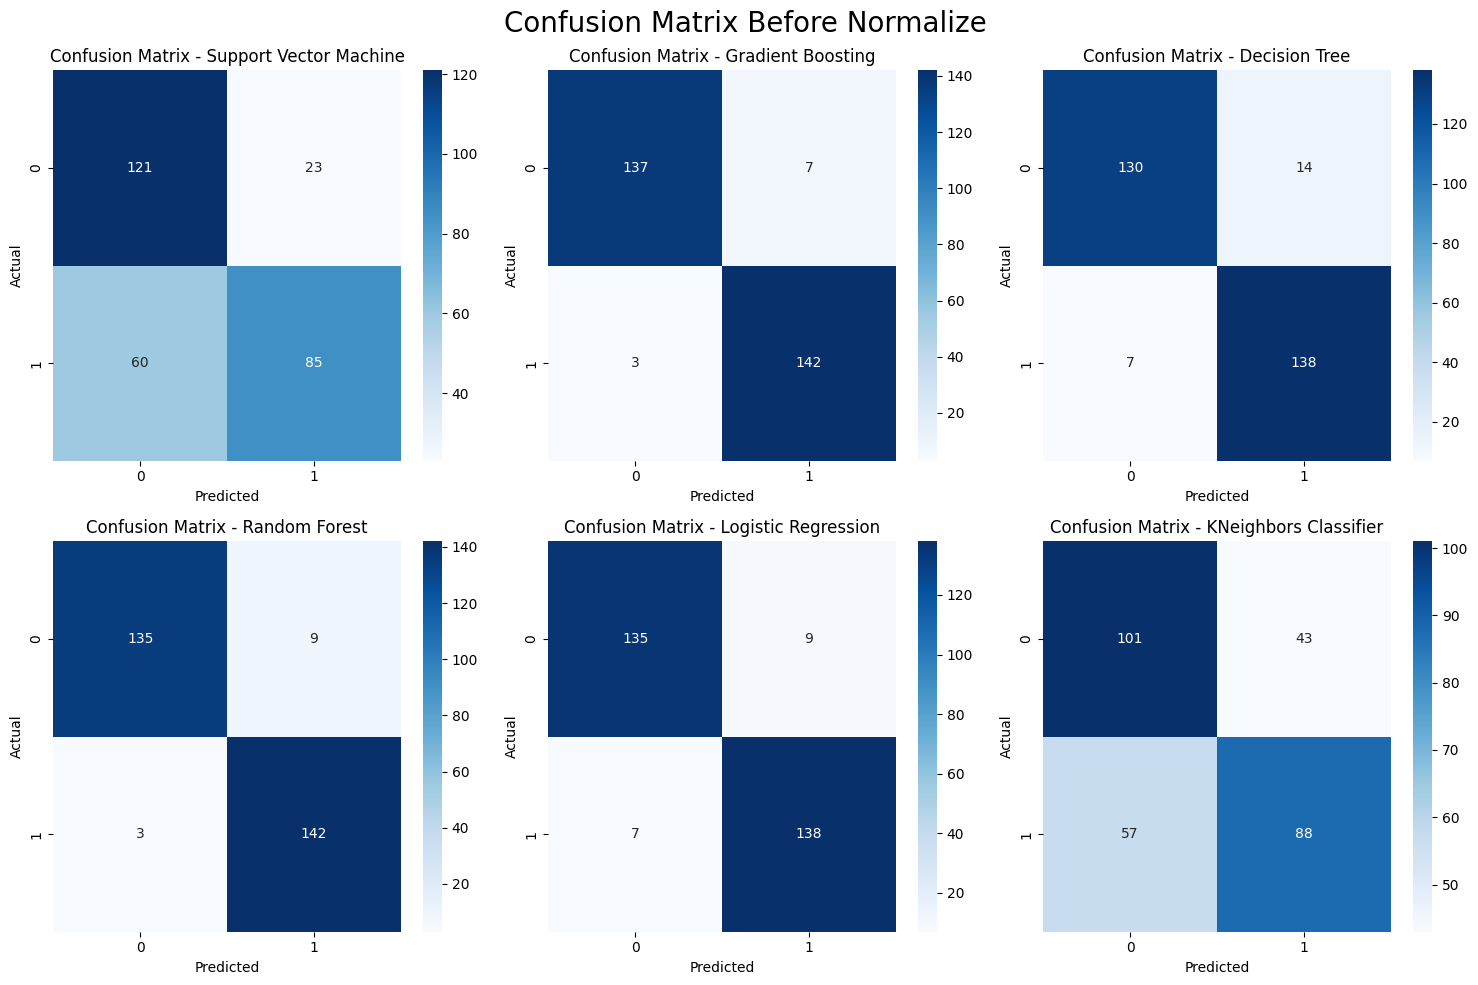

In [ ]:
# Membuat confusion matrix untuk setiap model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Membuat subplot
fig.suptitle('Confusion Matrix Before Normalize', fontsize=20)
axes = axes.ravel()  # Meratakan array axes

# Iterasi melalui models dan axes menggunakan zip
for (model_name, model), ax in zip(models, axes):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  # Menghitung confusion matrix

    # Visualisasi dengan seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()  # Menampilkan plot

In [ ]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create a list of models
models = [
    ("Support Vector Machine", SVC(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("KNeighbors Classifier", KNeighborsClassifier(n_neighbors=5))
]

# Membuat list untuk menyimpan hasil
results_list = []

# Melatih dan evaluasi semua model
for model_name, model in models:
    model.fit(X_train_normalized, y_train)
    y_pred = model.predict(X_test_normalized)  # Membuat prediksi pada data test

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Membuat DataFrame dari hasil evaluasi
results_after_normalization = pd.DataFrame(results_list)

# Tampilkan tabel hasil evaluasi
print("\nHasil Evaluasi Model Setelah Normalisasi:")
results_after_normalization


Hasil Evaluasi Model Setelah Normalisasi:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Support Vector Machine,0.972318,0.985816,0.958621,0.972028,0.972366
1,Gradient Boosting,0.965398,0.953020,0.979310,0.965986,0.965350
2,Decision Tree,0.927336,0.907895,0.951724,0.929293,0.927251
3,Random Forest,0.958478,0.940397,0.979310,0.959459,0.958405
4,Logistic Regression,0.965398,0.978723,0.951724,0.965035,0.965445
5,KNeighbors Classifier,0.737024,0.755556,0.703448,0.728571,0.737141


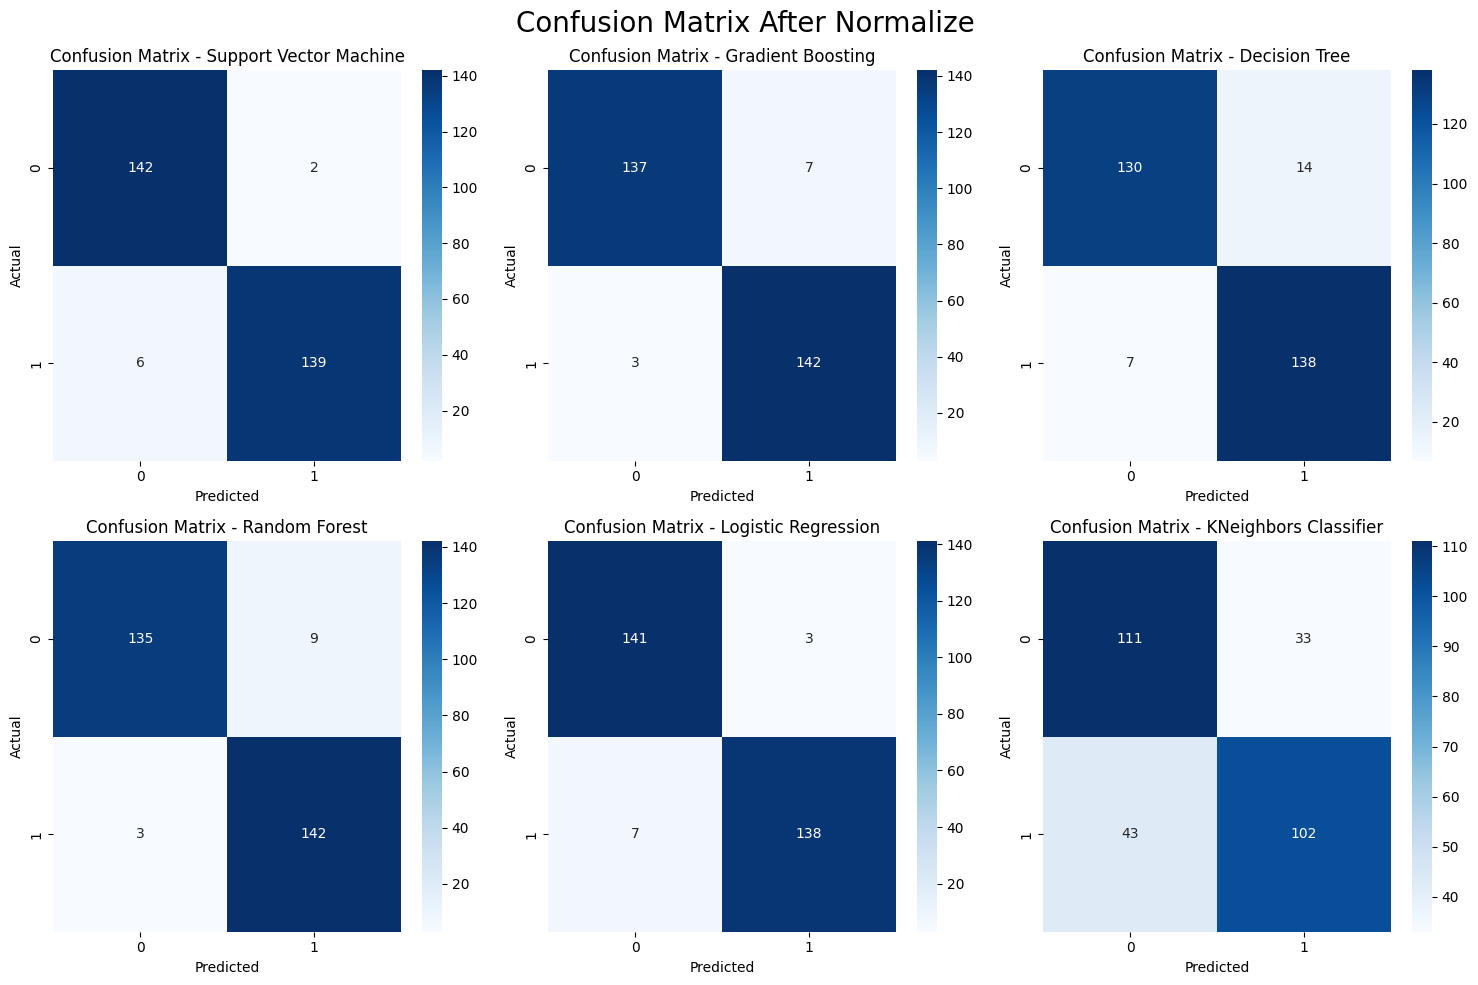

In [ ]:
# Membuat confusion matrix untuk setiap model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Membuat subplot
fig.suptitle('Confusion Matrix After Normalize', fontsize=20)
axes = axes.ravel()  # Meratakan array axes

# Iterasi melalui models dan axes menggunakan zip
for (model_name, model), ax in zip(models, axes):
    y_pred = model.predict(X_test_normalized)
    cm = confusion_matrix(y_test, y_pred)  # Menghitung confusion matrix

    # Visualisasi dengan seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()  # Menampilkan plot

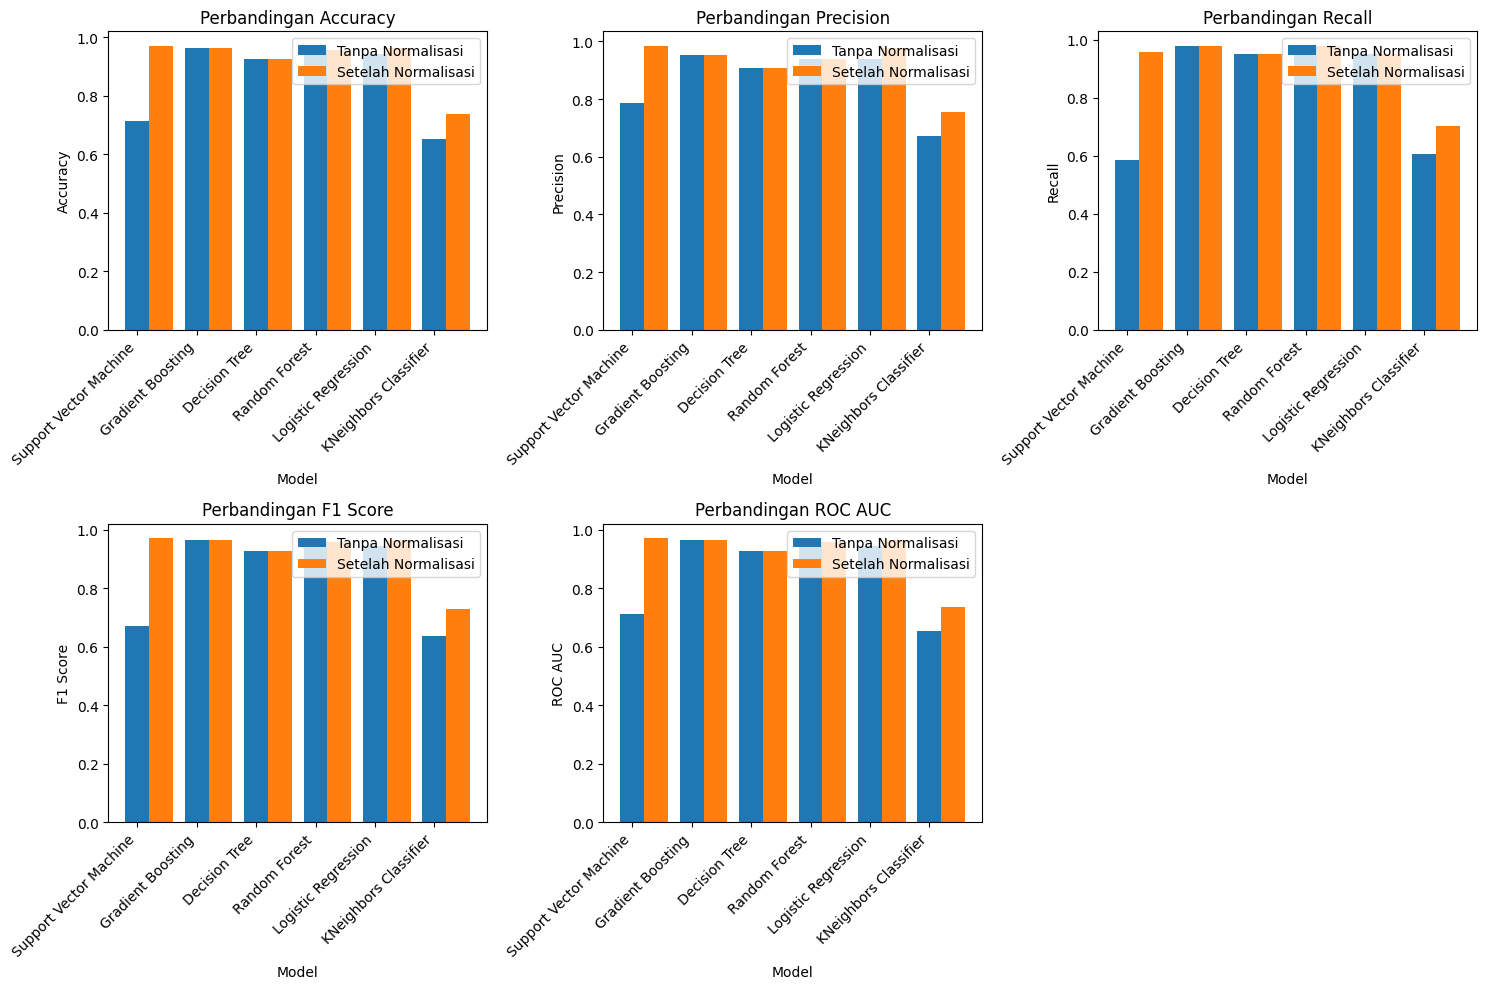

In [ ]:
results_before = results_before_normalization # DataFrame hasil evaluasi model TANPA normalisasi
results_after = results_after_normalization # DataFrame hasil evaluasi model SETELAH normalisasi

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)

    plt.bar(results_before['Model'], results_before[metric], label='Tanpa Normalisasi', width=0.4)
    plt.bar([x + 0.4 for x in range(len(results_after['Model']))], results_after[metric], label='Setelah Normalisasi', width=0.4)
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'Perbandingan {metric}')
    plt.xticks(rotation=45, ha="right")
    plt.legend()

plt.tight_layout()
plt.show()

Berdasarkan confusion matrix dan hasil dari berbagai evaluasi model, dapat disimpulkan bahwa model Support Vector Machine memiliki performa model yang paling baik, selain itu proses normalisasi juga membantu untuk meningkatkan perfroma model.

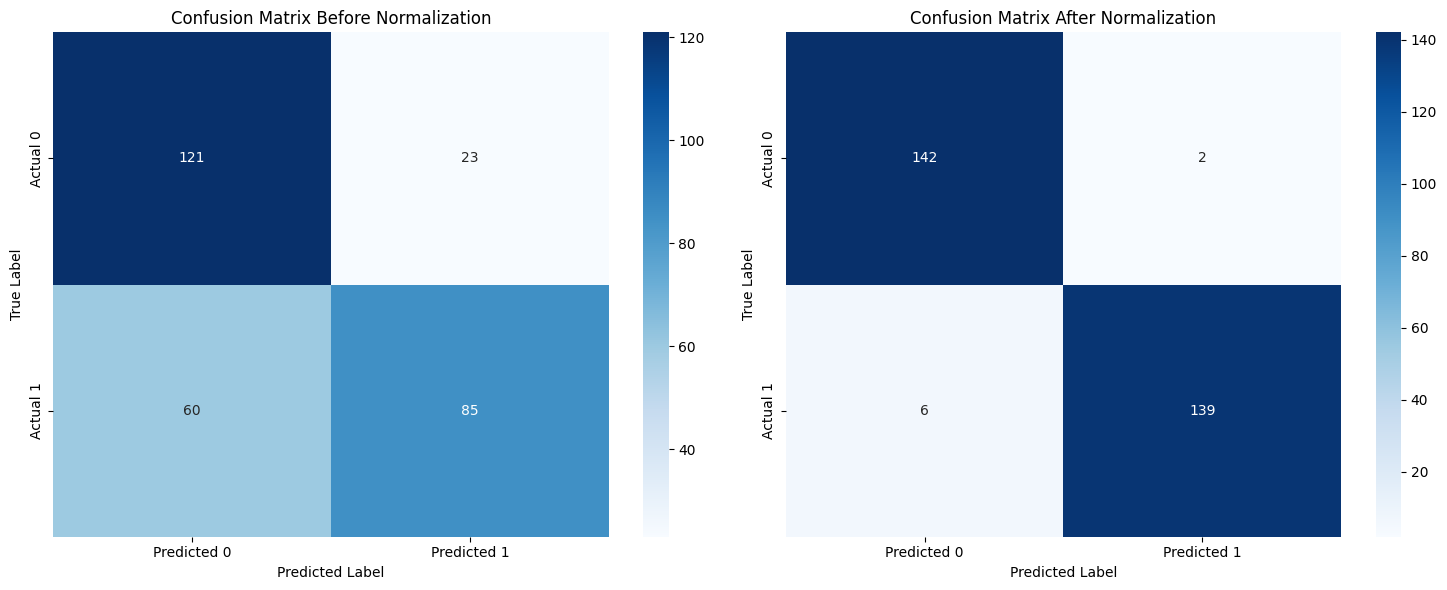

In [ ]:
# Confusion matrix sebelum normalization
model = SVC(random_state=42)

model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)
cm_before = confusion_matrix(y_test, y_pred_before)

# Confusion matrix setelah normalization
model.fit(X_train_normalized, y_train)
y_pred_after = model.predict(X_test_normalized)
cm_after = confusion_matrix(y_test, y_pred_after)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot confusion matrix sebelum normalization
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'], ax=axes[0])
axes[0].set_title("Confusion Matrix Before Normalization")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot confusion matrix sesudah normalization
sns.heatmap(cm_after, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'], ax=axes[1])
axes[1].set_title("Confusion Matrix After Normalization")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

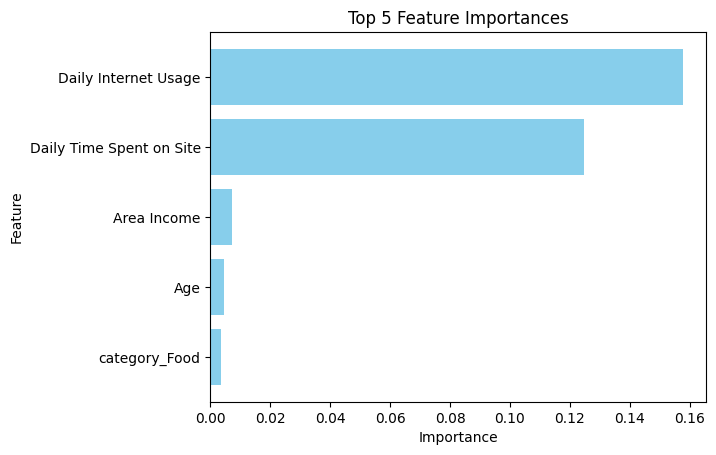

In [ ]:
model = SVC(random_state=42)
model.fit(X_train_normalized, y_train)

result = permutation_importance(model, X_train_normalized, y_train, n_repeats=10, random_state=42)

# Feature importance
feature_importance = result.importances_mean
feature_names = X.columns

# Membuat DataFrame untuk menyimpan nama fitur dan importancenya
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
sorted_feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot top 5 fitur importance
top_features = sorted_feature_df.tail(5)
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances')
plt.show()

# Business Recomendation Berdasarkan 2 Top Feature Importance (Daily Internet Usage, Daily Time Spent On site)


1.   **Optimalkan Pengalaman Pengguna** : Tingkatkan kualitas konten dan desain situs web untuk meningkatkan waktu yang dihabiskan pengguna di situs. Gunakan data pengguna untuk memberikan rekomendasi produk atau layanan yang relevan.
2.   **Segmentasi Pasar Berdasarkan Umur** : Kelompok usia lanjut cenderung lebih responsif terhadap iklan. Dengan demikian, kita dapat mengembangkan kampanye iklan yang tersegmentasi untuk menarik minat konsumen senior. Hal ini dapat melibatkan penawaran produk atau jasa yang sesuai dengan kebutuhan dan preferensi mereka.
3. **Segmentasi Berdasarkan Level Pendapatan** : Melihat ketertarikan yang tinggi dari pengguna dengan pendapatan rendah terhadap iklan, kita dapat mengoptimalkan anggaran iklan dengan menargetkan segmen pasar ini. Dengan menawarkan solusi hemat biaya, kita dapat membangun loyalitas pelanggan jangka panjang.


# Business Simulation



In [ ]:
df['Clicked on Ad'].value_counts()

,count
Clicked on Ad,
No,500
Yes,500


**Skenario 1 : Tanpa menggunakan machine learning**

*   Asumsi :
  * Biaya per iklan : Rp 1.000
  * Nilai rata-rata pembelian : Rp 500.000
  * Conversion rate (CR): 5%
  * Target jumlah pengiklanan : 1.000 pengguna
  * Jumlah pengguna benar-benar klik iklan : 500 orang
  * Click rate : 500/1.000 * 100 = 50%

* Perhitungan :
  - **Biaya iklan** : Rp 1.000 x 1.000 pengguna = Rp 1.000.000
  - **Jumlah pembelian** : Jumlah pengguna benar-benar klik iklan x CR = 500 pengguna x 5% = 25 pembelian
  - **Revenue** : Jumlah pembelian x Nilai rata-rata pembelian = 25 pembelian x Rp 500.000 = Rp 12.500.000
  - **Profit** : Revenue - Biaya iklan = Rp 12.500.000 - Rp 1.000.000 = Rp 11.500.000




**Skenario 2 : Dengan menggunakan machine learning**

*   Asumsi :
  * Biaya per iklan : Rp 1.000
  * Nilai rata-rata pembelian : Rp 500.000
  * Conversion rate (CR): 5%
  * Target jumlah pengiklanan : 1.000 pengguna
  * Jumlah pengguna yang benar-benar klik iklan : Precision x Target jumlah pengguna = 98% * 1.000 pengguna = 980 pengguna
  * Click rate : 980/1.000 * 100 = 98%

* Perhitungan :
  - **Biaya iklan** : Rp 1.000 x 1.000 pengguna = Rp 1.000.000
  - **Jumlah pembelian** : Jumlah pengguna benar-benar klik iklan x CR = 980 pengguna x 5% = 49 pembelian
  - **Revenue** : Jumlah pembelian x Nilai rata-rata pembelian = 49 pembelian x Rp 500.000 = Rp 24.500.000
  - **Profit** : Revenue - Biaya iklan = Rp 24.500.000 - Rp 1.000.000 = Rp 23.500.000


# **Kesimpulan**:

Dengan membandingkan profit dan click rate sebelum dan sesudah penerapan model, kita dapat melihat bahwa dengan penerapan model, click rate meningkat dari 50% menjadi 98%, dan profit juga meningkat dari **Rp 11.500.000** menjadi **Rp 23.500.000** (peningkatan sebesar **104,35%**).